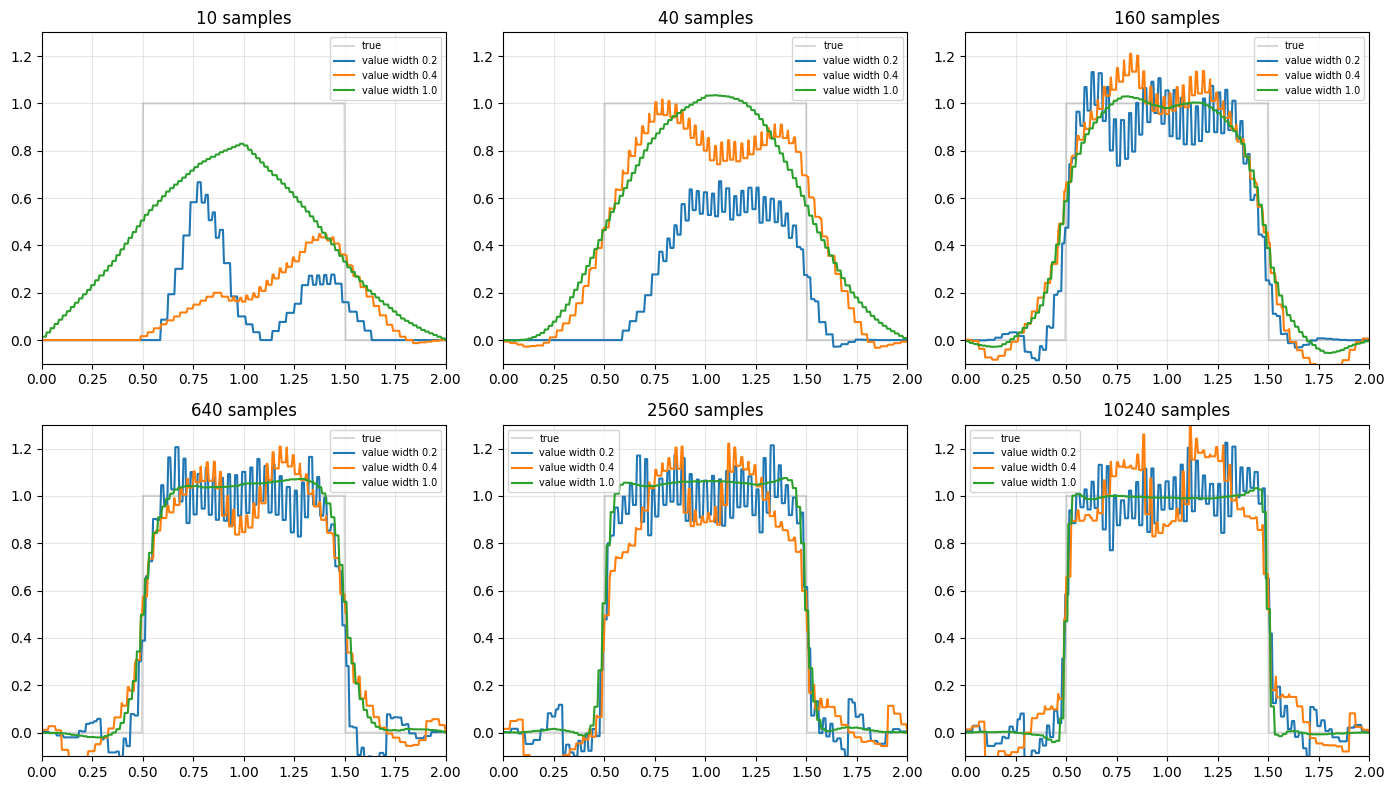

✅ Image saved at: generated_images/figure_9_8.png


In [4]:

import numpy as np
import matplotlib.pyplot as plt
import os

# --- Define helper classes & functions ---

class Interval:
    def __init__(self, left, right):
        self.left = left
        self.right = right
    def contain(self, point):
        return self.left <= point < self.right
    def size(self):
        return self.right - self.left

DOMAIN = Interval(left=0.0, right=2.0)

class ValueFunction:
    def __init__(self, feature_width, domain=DOMAIN, step_size=0.2, num_of_features=50):
        self.feature_width = feature_width
        self.domain = domain
        self.step_size = step_size
        self.num_of_features = num_of_features
        self.features = []

        step = (domain.size() - feature_width) / (num_of_features - 1)
        left = domain.left
        for _ in range(num_of_features - 1):
            self.features.append(Interval(left, left + feature_width))
            left += step
        self.features.append(Interval(left, domain.right))
        self.weights = np.zeros(num_of_features)

    def get_active_features(self, point):
        return [i for i, f in enumerate(self.features) if f.contain(point)]

    def value(self, point):
        active = self.get_active_features(point)
        return np.sum(self.weights[active])

    def update(self, delta, point):
        active = self.get_active_features(point)
        if not active:
            return
        delta *= self.step_size / len(active)
        for i in active:
            self.weights[i] += delta

def square_wave(point):
    return 1 if 0.5 < point < 1.5 else 0

def sample(samples_number):
    samples = []
    for _ in range(samples_number):
        x = np.random.uniform(DOMAIN.left, DOMAIN.right)
        y = square_wave(x)
        samples.append((x, y))
    return samples

def approximate(samples, value_function):
    for x, y in samples:
        delta = y - value_function.value(x)
        value_function.update(delta, x)

# --- Generate figure ---
os.makedirs("generated_images", exist_ok=True)

sample_counts = [10, 40, 160, 640, 2560, 10240]
feature_widths = [0.2, 0.4, 1.0]
xs = np.linspace(DOMAIN.left, DOMAIN.right, 400)

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.ravel()

for ax, n in zip(axes, sample_counts):
    ax.plot(xs, [square_wave(x) for x in xs], color="gray", alpha=0.3, label="true")
    for w in feature_widths:
        vf = ValueFunction(feature_width=w)
        data = sample(n)
        approximate(data, vf)
        ax.plot(xs, [vf.value(x) for x in xs], label=f"value width {w}")
    ax.set_title(f"{n} samples")
    ax.set_xlim(DOMAIN.left, DOMAIN.right)
    ax.set_ylim(-0.1, 1.3)
    ax.legend(fontsize=7)
    ax.grid(alpha=0.3)

fig.tight_layout()
out_path = "generated_images/figure_9_8.png"
fig.savefig(out_path, dpi=150, bbox_inches="tight")
plt.show()

print("✅ Image saved at:", out_path)
